<a href="https://colab.research.google.com/github/anumondal1/Amazon-Customer-Segmentation/blob/main/6211_Final_Project_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 6211 Final Project
#Model 2 Random Forest on Cart Completion Frequency


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets #Import scikit-learn dataset library
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import GridSearchCV # Import for hyperparameter tuning
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

In [ ]:
#load Dataset
Amazon = pd.read_csv("Amazon Customer Behavior Survey.csv")

In [ ]:
# Print dataset info
Amazon.info()

In [ ]:
# Dataset Statistics. We dont need include='all' as all of our variables are numbers!
Amazon.describe().T

count       mean        std  min  \
age                                     602.0  30.790698  10.193276  3.0   
Customer_Reviews_Importance             602.0   2.480066   1.185226  1.0   
Personalized_Recommendation_Frequency   602.0   2.699336   1.042028  1.0   
Rating_Accuracy                         602.0   2.672757   0.899744  1.0   
Shopping_Satisfaction                   602.0   2.463455   1.012152  1.0   

                                         25%   50%   75%   max  
age                                     23.0  26.0  36.0  67.0  
Customer_Reviews_Importance              1.0   3.0   3.0   5.0  
Personalized_Recommendation_Frequency    2.0   3.0   3.0   5.0  
Rating_Accuracy                          2.0   3.0   3.0   5.0  
Shopping_Satisfaction                    2.0   2.0   3.0   5.0

In [ ]:
#check for missing values
Amazon.isna().sum()

In [ ]:
# Impute missing values with the most frequent value
most_common_method = Amazon['Product_Search_Method'].mode()[0]
Amazon['Product_Search_Method'].fillna(most_common_method, inplace=True)
Amazon.isna().sum()

In [ ]:
value_counts = Amazon['Cart_Completion_Frequency'].value_counts()

print(value_counts)

In [ ]:
value_counts = Amazon['Browsing_Frequency'].value_counts()

print(value_counts)

Browsing_Frequency
Few times a week        249
Few times a month       199
Rarely                   77
Multiple times a day     77
Name: count, dtype: int64


In [ ]:
value_counts = Amazon['Purchase_Frequency'].value_counts()

print(value_counts)

In [ ]:
value_counts = Amazon['Gender'].value_counts()

print(value_counts)

In [ ]:
value_counts = Amazon['Shopping_Satisfaction'].value_counts()

print(value_counts)

In [ ]:
# Create a new column based on 'Cart_Completion_Frequency' column with half of Sometimes replaced by often and half by rarely
Cart_Completion = Amazon['Cart_Completion_Frequency'].values
half_index = len(Cart_Completion) // 2

# Replace half of Sometimes with Often and the other half with Rarely
new_cart = np.where(Cart_Completion == 'Sometimes', np.where(np.arange(len(Cart_Completion)) < half_index, 'Often', 'Rarely'), Cart_Completion)

# Assign the new column to the dataframe
Amazon['New_Column'] = new_cart

# Display the updated dataframe
print(Amazon)

In [ ]:
value_counts = Amazon['New_Column'].value_counts()

print(value_counts)

New_Column
Often     301
Rarely    233
Always     47
Never      21
Name: count, dtype: int64


In [ ]:
#Create New column for Cart Completion Frequency
#4 values currently are Always, Often, Rarely, Never
#New column will just be a Yes or No column where Always,Often, and go to Yes and Rarely and Never go to No

mapping = {'Always': 'Yes', 'Often': 'Yes', 'Rarely': 'No', 'Never': 'No'}

# Apply mapping to the column
Amazon['Cart_Completion'] = Amazon['New_Column'].map(mapping)

print(Amazon)

In [ ]:
Amazon['Cart_Completion'].head(20)

In [ ]:
value_counts = Amazon['Cart_Completion'].value_counts()

print(value_counts)

Cart_Completion
Yes    348
No     254
Name: count, dtype: int64


In [ ]:
# One-hot encoding categorical variables
categorical_variables = ['Gender','Purchase_Frequency', 'Browsing_Frequency', 'Shopping_Satisfaction']
Amazon_encoded = pd.get_dummies(Amazon, columns=categorical_variables, dtype="int")


In [ ]:
Amazon_encoded.info()

In [ ]:
value_counts = Amazon['Cart_Completion'].value_counts()

print(value_counts)

Cart_Completion
Yes    348
No     254
Name: count, dtype: int64


In [ ]:
 #split dataset in features and target variable
feature_cols = ['age', 'Gender_Male','Gender_Female', 'Shopping_Satisfaction_1','Shopping_Satisfaction_2','Shopping_Satisfaction_3','Shopping_Satisfaction_4','Shopping_Satisfaction_5',
                'Purchase_Frequency_Few times a month','Purchase_Frequency_Less than once a month','Purchase_Frequency_Multiple times a week','Purchase_Frequency_Once a month', 'Purchase_Frequency_Once a week','Browsing_Frequency_Few times a month','Browsing_Frequency_Few times a week',
                'Browsing_Frequency_Multiple times a day', 'Browsing_Frequency_Rarely']
# Features
X = Amazon_encoded[feature_cols]
# Target variable
y = Amazon_encoded['Cart_Completion']

In [ ]:
# Split dataset into training set and test set, declare random state for repeatability
 # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state = 42)

# Train Decision Tree Classifer
dt = dt.fit(X_train, y_train)

# Predict the response for test and train dataset
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))
# Check the accuracy for train
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy Test: 0.5580110497237569
Accuracy Train: 0.9429928741092637


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)

# Print the metrics
print("F1 Score: ", np.round(f1,3))
print("Accuracy: ", np.round(accuracy,3))
tree_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
print("ROC AUC:", np.round(tree_auc,3))

[[40 38]
 [42 61]]
F1 Score:  0.484
Accuracy:  0.558
ROC AUC: 0.574


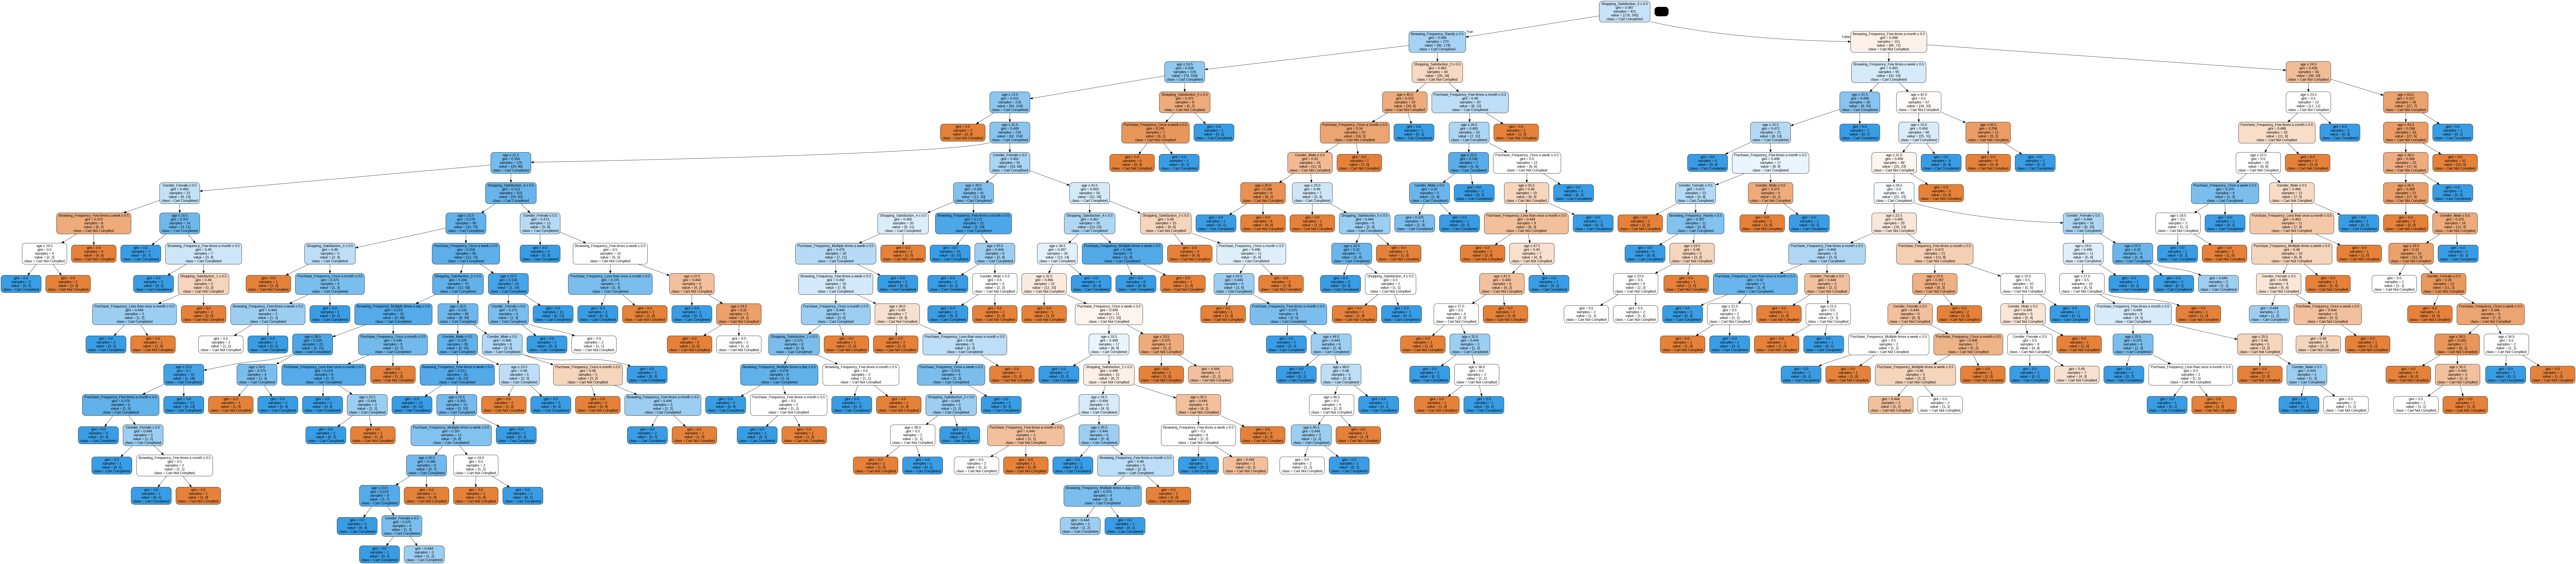

In [ ]:
#Import some additional libraries
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Plot the decision tree
dot_data = StringIO()
export_graphviz(dt,
                out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Cart Not Complted','Cart Completed'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Amazon.png')
Image(graph.create_png())

In [ ]:
#Attempt 2 - Gonna try and combine more columns to see if accuracy increases
Amazon2 = pd.read_csv("Amazon Customer Behavior Survey.csv")

In [ ]:
# Impute missing values with the most frequent value
most_common_method = Amazon2['Product_Search_Method'].mode()[0]
Amazon2['Product_Search_Method'].fillna(most_common_method, inplace=True)
Amazon2.isna().sum()

In [ ]:
# Create a new column based on 'Cart_Completion_Frequency' column with half of Sometimes replaced by often and half by rarely
Cart_Completion = Amazon2['Cart_Completion_Frequency'].values
half_index2 = len(Cart_Completion) // 2

# Replace half of Sometimes with Often and the other half with Rarely
new_cart2 = np.where(Cart_Completion == 'Sometimes', np.where(np.arange(len(Cart_Completion)) < half_index2, 'Often', 'Rarely'), Cart_Completion)

# Assign the new column to the dataframe
Amazon2['New_Column'] = new_cart2

# Display the updated dataframe
print(Amazon2)

In [ ]:
#Create New column for Cart Completion Frequency
#4 values currently are Always, Often, Rarely, Never
#New column will just be a Yes or No column where Always,Often, and go to Yes and Rarely and Never go to No

mapping = {'Always': 'Yes', 'Often': 'Yes', 'Rarely': 'No', 'Never': 'No'}

# Apply mapping to the column
Amazon2['Cart_Completion'] = Amazon2['New_Column'].map(mapping)

print(Amazon2)

In [ ]:
#Create New column for Purchase Frequency
#new values will be weekly - Once a week and multiple times a week
#other new value will be monthly - once a month, few times a month, less than once a month

mapping_purch = {'Once a week': 'Weekly', 'Multiple times a week': 'Weekly', 'Once a month':'Monthly', 'Few times a month': 'Monthly', 'Less than once a month':'Monthly'}
Amazon2['Purch_Freq'] = Amazon2['Purchase_Frequency'].map(mapping_purch)
print(Amazon2)

In [ ]:
#Create New column for browsing Freqeuncy
#new value will be weekly - Few times a week, Multiple times a day
#new value will be monthly - Rarely, Few times a month
mapping_browse = {'Few times a week': 'Weekly', 'Multiple times a day': 'Weekly', 'Few times a month': 'Monthly', 'Rarely':'Monthly'}
Amazon2['Browse_Freq'] = Amazon2['Browsing_Frequency'].map(mapping_browse)
print(Amazon2)

In [ ]:
#create new gender column where Other and Prefer not to say are the same thing
mapping_gender = {'Male':'Male', 'Female':'Female','Others':'Other', 'Prefer not to say': 'Other'}
Amazon2['New_Gender'] = Amazon2['Gender'].map(mapping_gender)
print(Amazon2)

In [ ]:
# One-hot encoding categorical variables
categorical_variables2 = ['New_Gender','Purch_Freq', 'Browse_Freq', 'Shopping_Satisfaction']
Amazon_encoded2 = pd.get_dummies(Amazon2, columns=categorical_variables2, dtype="int")


In [ ]:
Amazon_encoded2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   602 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [ ]:
 #split dataset in features and target variable
feature_cols2 = ['age', 'New_Gender_Male','New_Gender_Female', 'New_Gender_Other', 'Shopping_Satisfaction_1','Shopping_Satisfaction_2','Shopping_Satisfaction_3','Shopping_Satisfaction_4','Shopping_Satisfaction_5',
                'Purch_Freq_Weekly','Purch_Freq_Monthly','Browse_Freq_Weekly','Browse_Freq_Monthly']
# Features
X2 = Amazon_encoded2[feature_cols2]
# Target variable
y2 = Amazon_encoded2['Cart_Completion']

In [ ]:
# Split dataset into training set and test set, declare random state for repeatability
 # 70% training and 30% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [ ]:
# Create Decision Tree classifer object
dt2 = DecisionTreeClassifier(random_state = 42)

# Train Decision Tree Classifer
dt2 = dt2.fit(X_train2, y_train2)

# Predict the response for test and train dataset
y_pred2 = dt2.predict(X_test2)
y_pred_train2 = dt2.predict(X_train2)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test2, y_pred2))
# Check the accuracy for train
print("Accuracy Train:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy Test: 0.47513812154696133
Accuracy Train: 0.8931116389548693


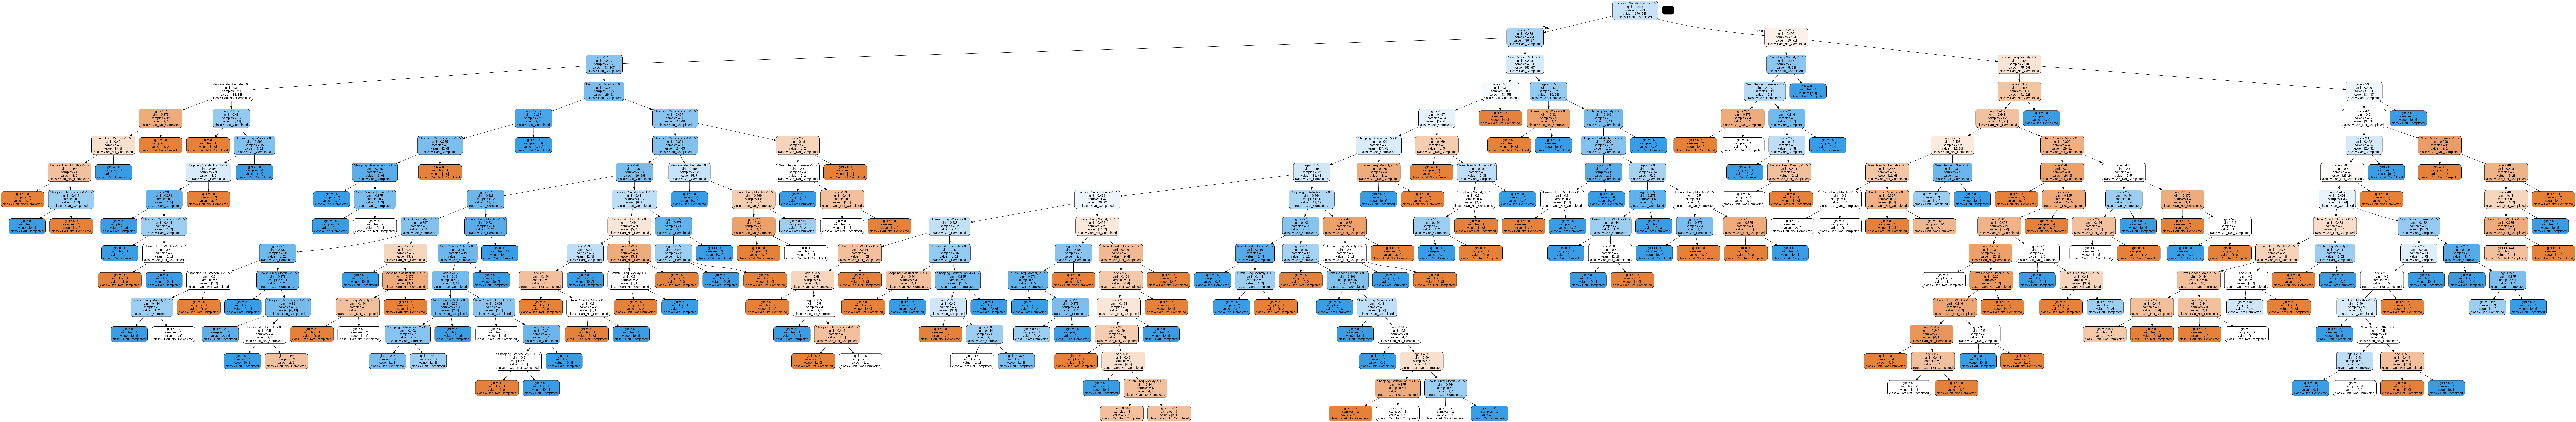

In [ ]:
#Import some additional libraries
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

# Plot the decision tree
dot_data = StringIO()
export_graphviz(dt2,
                out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols2,class_names=['Cart_Not_Completed','Cart_Completed'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Amazon.png')
Image(graph.create_png())

In [ ]:
#Model 1 Performed better so we will use this model going forward
#next Steps are to create random forest and run hyper parameter tuning

In [ ]:
# Define the Decision Tree model
model = DecisionTreeClassifier(random_state = 42)

# Define the hyperparameters to be tuned
param_grid = {'criterion': ['entropy','gini'],
              'max_depth': [2, 3, 4],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}

# Perform grid search
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

# Extract best model and evaluate it on test set
best_model = grid.best_estimator_
print("Accuracy of best decision tree: ", best_model.score(X_test, y_test))


Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.586890756302521
Accuracy of best decision tree:  0.6022099447513812


In [ ]:
#Import Random Forest Function
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf=RandomForestClassifier(n_estimators=10, random_state=1)

#n_estimators: Number of trees in the forest

# Train the model using the training set
rf.fit(X_train,y_train)

# Predict obs in test set
y_pred_rf=rf.predict(X_test)
y_pred_train_rf=rf.predict(X_train)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred_rf))
# Check the accuracy for train
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train_rf))

Accuracy Test: 0.5524861878453039
Accuracy Train: 0.9216152019002375


In [ ]:
#Hyperparameter Tuning.
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [1, 5, 10, 20, 50, 100, 150, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,3]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 4)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
# Create a Random Forest Classifier
rf1=RandomForestClassifier(n_estimators=150, max_depth=3, max_features='sqrt',random_state=42)
#n_estimators: Number of trees in the forest

# Train the model using the training set
rf1.fit(X_train,y_train)

# Predict obs in test set
y_pred_rf1=rf1.predict(X_test)
y_pred_train_rf1=rf1.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred_rf1))
# Model Accuracy, how often is the classifier correct?
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train_rf1))

Accuracy Test: 0.5966850828729282
Accuracy Train: 0.6745843230403801


Tree 0


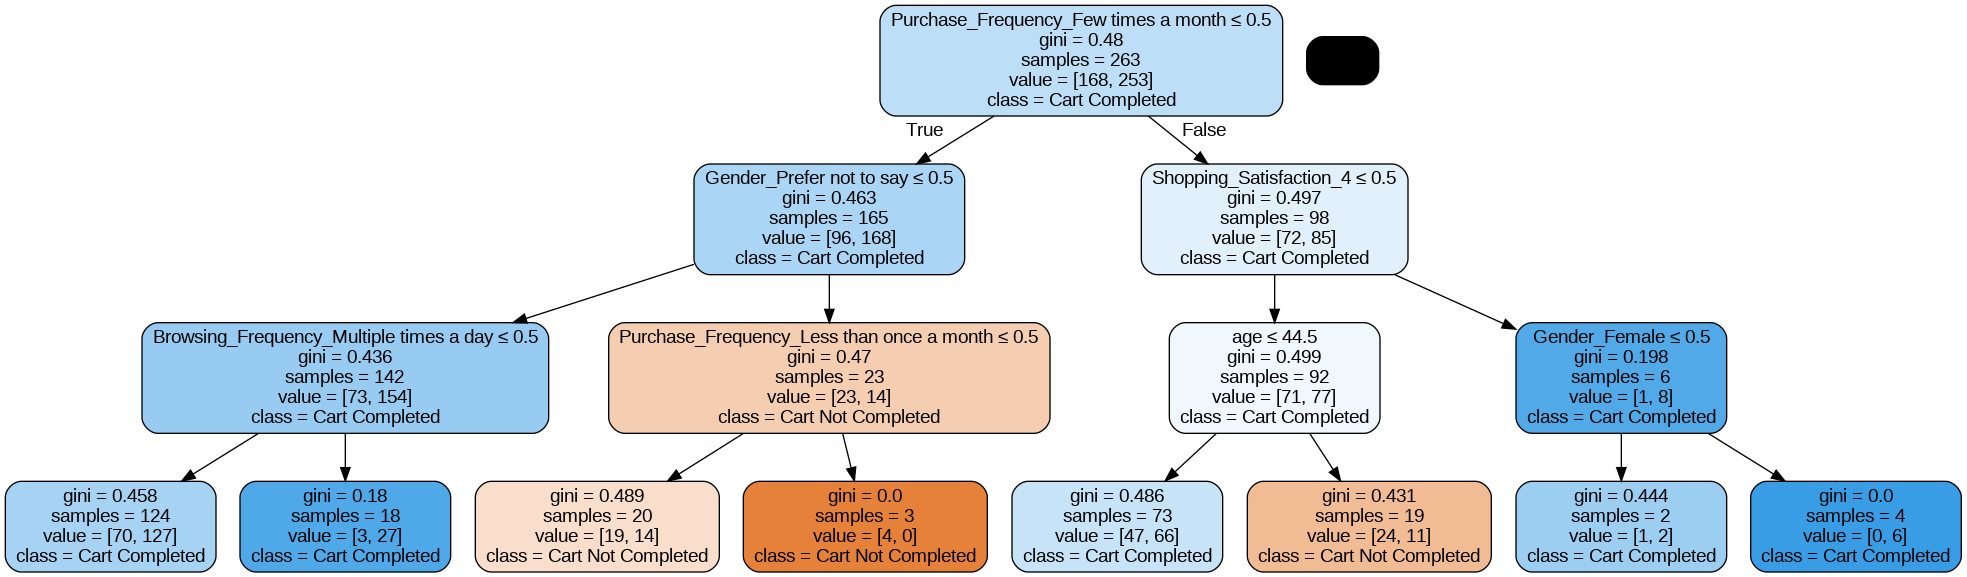

Tree 1


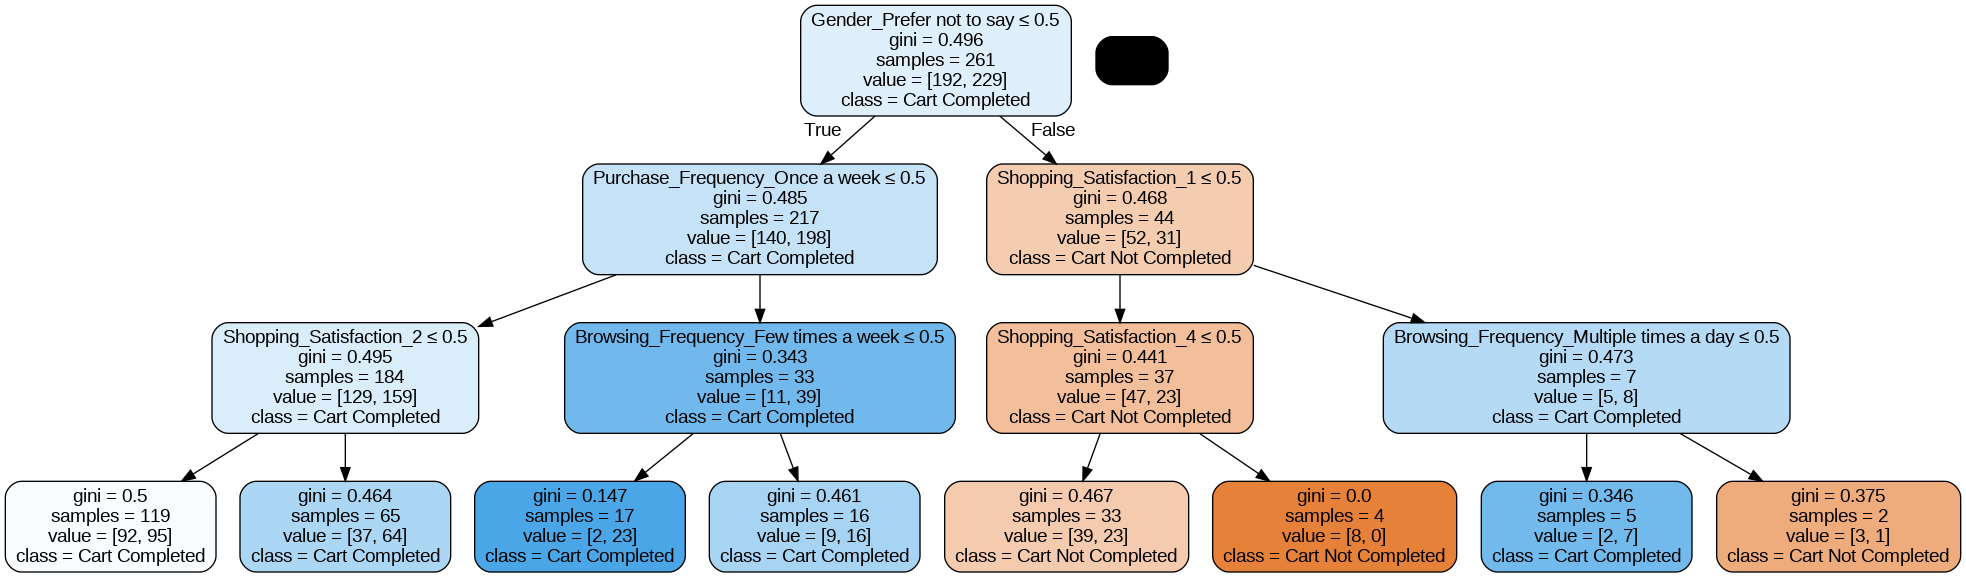

Tree 2


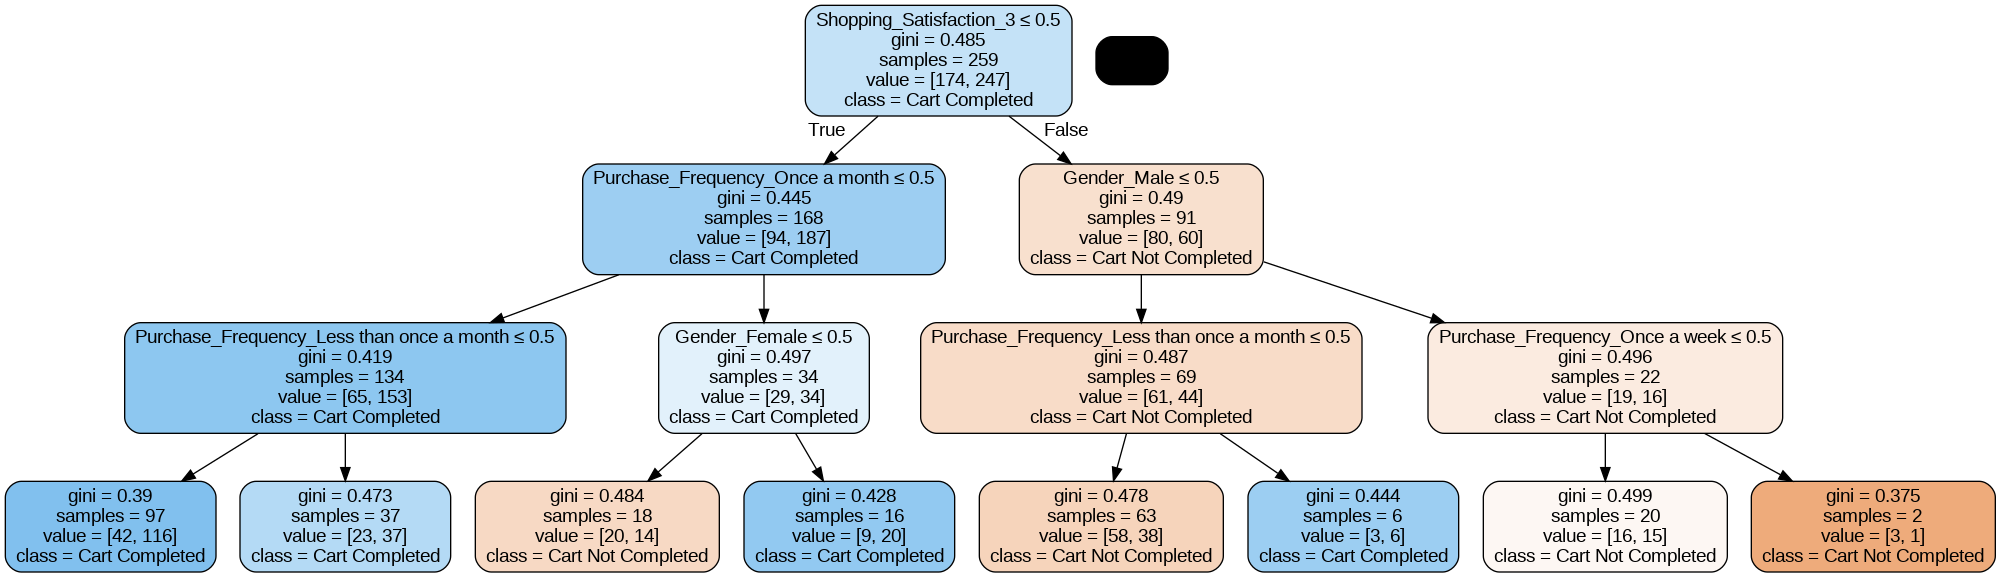

In [ ]:
#Plot individual trees in random forest.


num_trees_to_plot = 3

for i in range(num_trees_to_plot):
    # Plot individual trees and save as PNG
    dot_data = StringIO()
    export_graphviz(rf1.estimators_[i]
                    , out_file=dot_data,
                  filled=True, rounded=True,
                   special_characters=True, feature_names = feature_cols,class_names=['Cart Not Completed','Cart Completed'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(f'Amazon_tree_{i+1}.png')
    print(f'Tree {i}')
    # Display the plot
    display(Image(graph.create_png()))